# PROJECT  ID - PTID-CDS-JUL-23-1576

# PRCP-1016-HeartDieseasePred

# PROBLEM STATEMENT

- Task 1:-Prepare a complete data analysis report on the given data.

- Task 2:- Create a model predicting potential Heart Diseases in people using Machine Learning algorithms.

- Task3:-Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats.


## IMPORT BASIC LIBRARIES

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


## DOMAIN ANALYSIS

1. There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.
2. slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
3. thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
4. resting_blood_pressure (type: int): resting blood pressure
5. chest_pain_type (type: int): chest pain type (4 values)
6. num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
7. fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
8. resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
9. serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
10. oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of    abnormality in electrocardiograms
11. sex (type: binary): 0: female, 1: male
12. age (type: int): age in years
13. max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
14.	exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)


# Model Building

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


# Loading Data

In [3]:
df=pd.read_csv('valuesheartdisease.csv')


In [4]:
df.head()

,patient_id,slope,thal,resting_bp,cp,majorvessels,fastingbloodsugar,restingekg,serumcholesterol,stdepression,sex,age,maxheartrate,exercise_cp,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


# Basic Checks

In [5]:
print(df.columns)


Index(['patient_id', 'slope', 'thal', 'resting_bp', 'cp', 'majorvessels',
       'fastingbloodsugar', 'restingekg', 'serumcholesterol', 'stdepression',
       'sex', 'age', 'maxheartrate', 'exercise_cp', 'heart_disease_present'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             180 non-null    object 
 1   slope                  180 non-null    int64  
 2   thal                   180 non-null    object 
 3   resting_bp             180 non-null    int64  
 4   cp                     180 non-null    int64  
 5   majorvessels           180 non-null    int64  
 6   fastingbloodsugar      180 non-null    int64  
 7   restingekg             180 non-null    int64  
 8   serumcholesterol       180 non-null    int64  
 9   stdepression           180 non-null    float64
 10  sex                    180 non-null    int64  
 11  age                    180 non-null    int64  
 12  maxheartrate           180 non-null    int64  
 13  exercise_cp            180 non-null    int64  
 14  heart_disease_present  180 non-null    int64  
dtypes: flo

In [7]:
df.shape

(180, 15)

- INFERENCE:- We have a dataset with 180 rows which indicates a smmaller set of data

### Checking Misiing Values

In [8]:
df.isnull().sum()

patient_id               0
slope                    0
thal                     0
resting_bp               0
cp                       0
majorvessels             0
fastingbloodsugar        0
restingekg               0
serumcholesterol         0
stdepression             0
sex                      0
age                      0
maxheartrate             0
exercise_cp              0
heart_disease_present    0
dtype: int64

- They have no missing values

In [9]:
#Taking care of Duplicate values
df_dup = df.duplicated().any()

In [10]:
df_dup

False

- They have no duplicate values

# EDA( Exploratory Data Anaysis)

In [11]:
#Stactistical measures about the data
df.describe()

,slope,resting_bp,cp,majorvessels,fastingbloodsugar,restingekg,serumcholesterol,stdepression,sex,age,maxheartrate,exercise_cp,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


- It is always better to check the correlation between the features so that we can analysis that which feature is negatively correlated and which is positively correlation between various features.

## To get correlation of each features in dataset

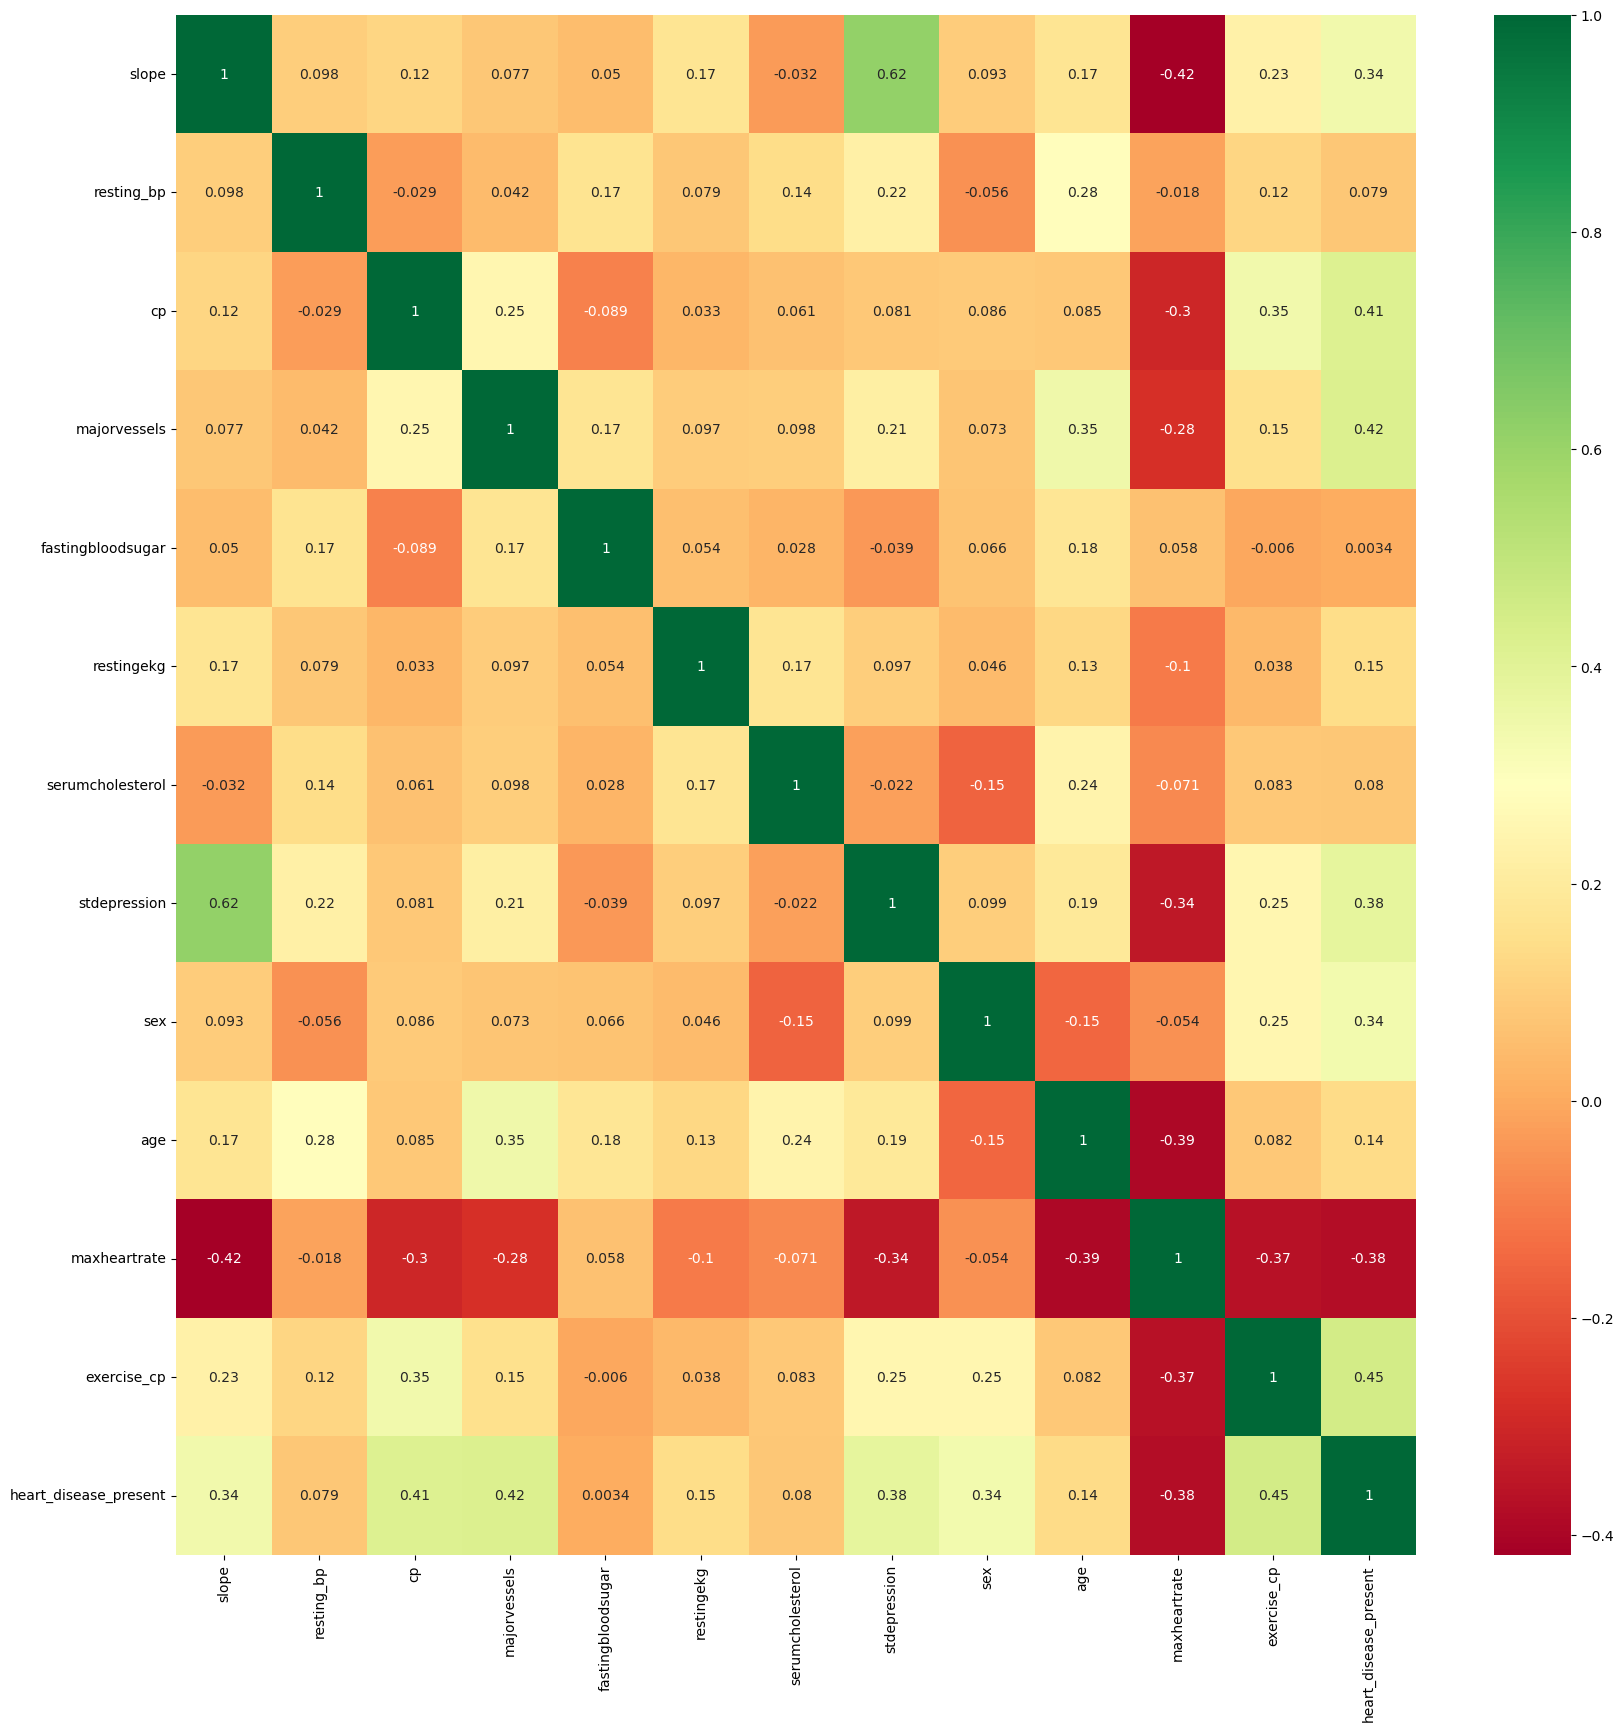

In [12]:
# Checking the correlation between various features
import seaborn as sns
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

- By far we have checked the correlation between the features but it also a good practice to check the correlation of the heart_disease_present variable

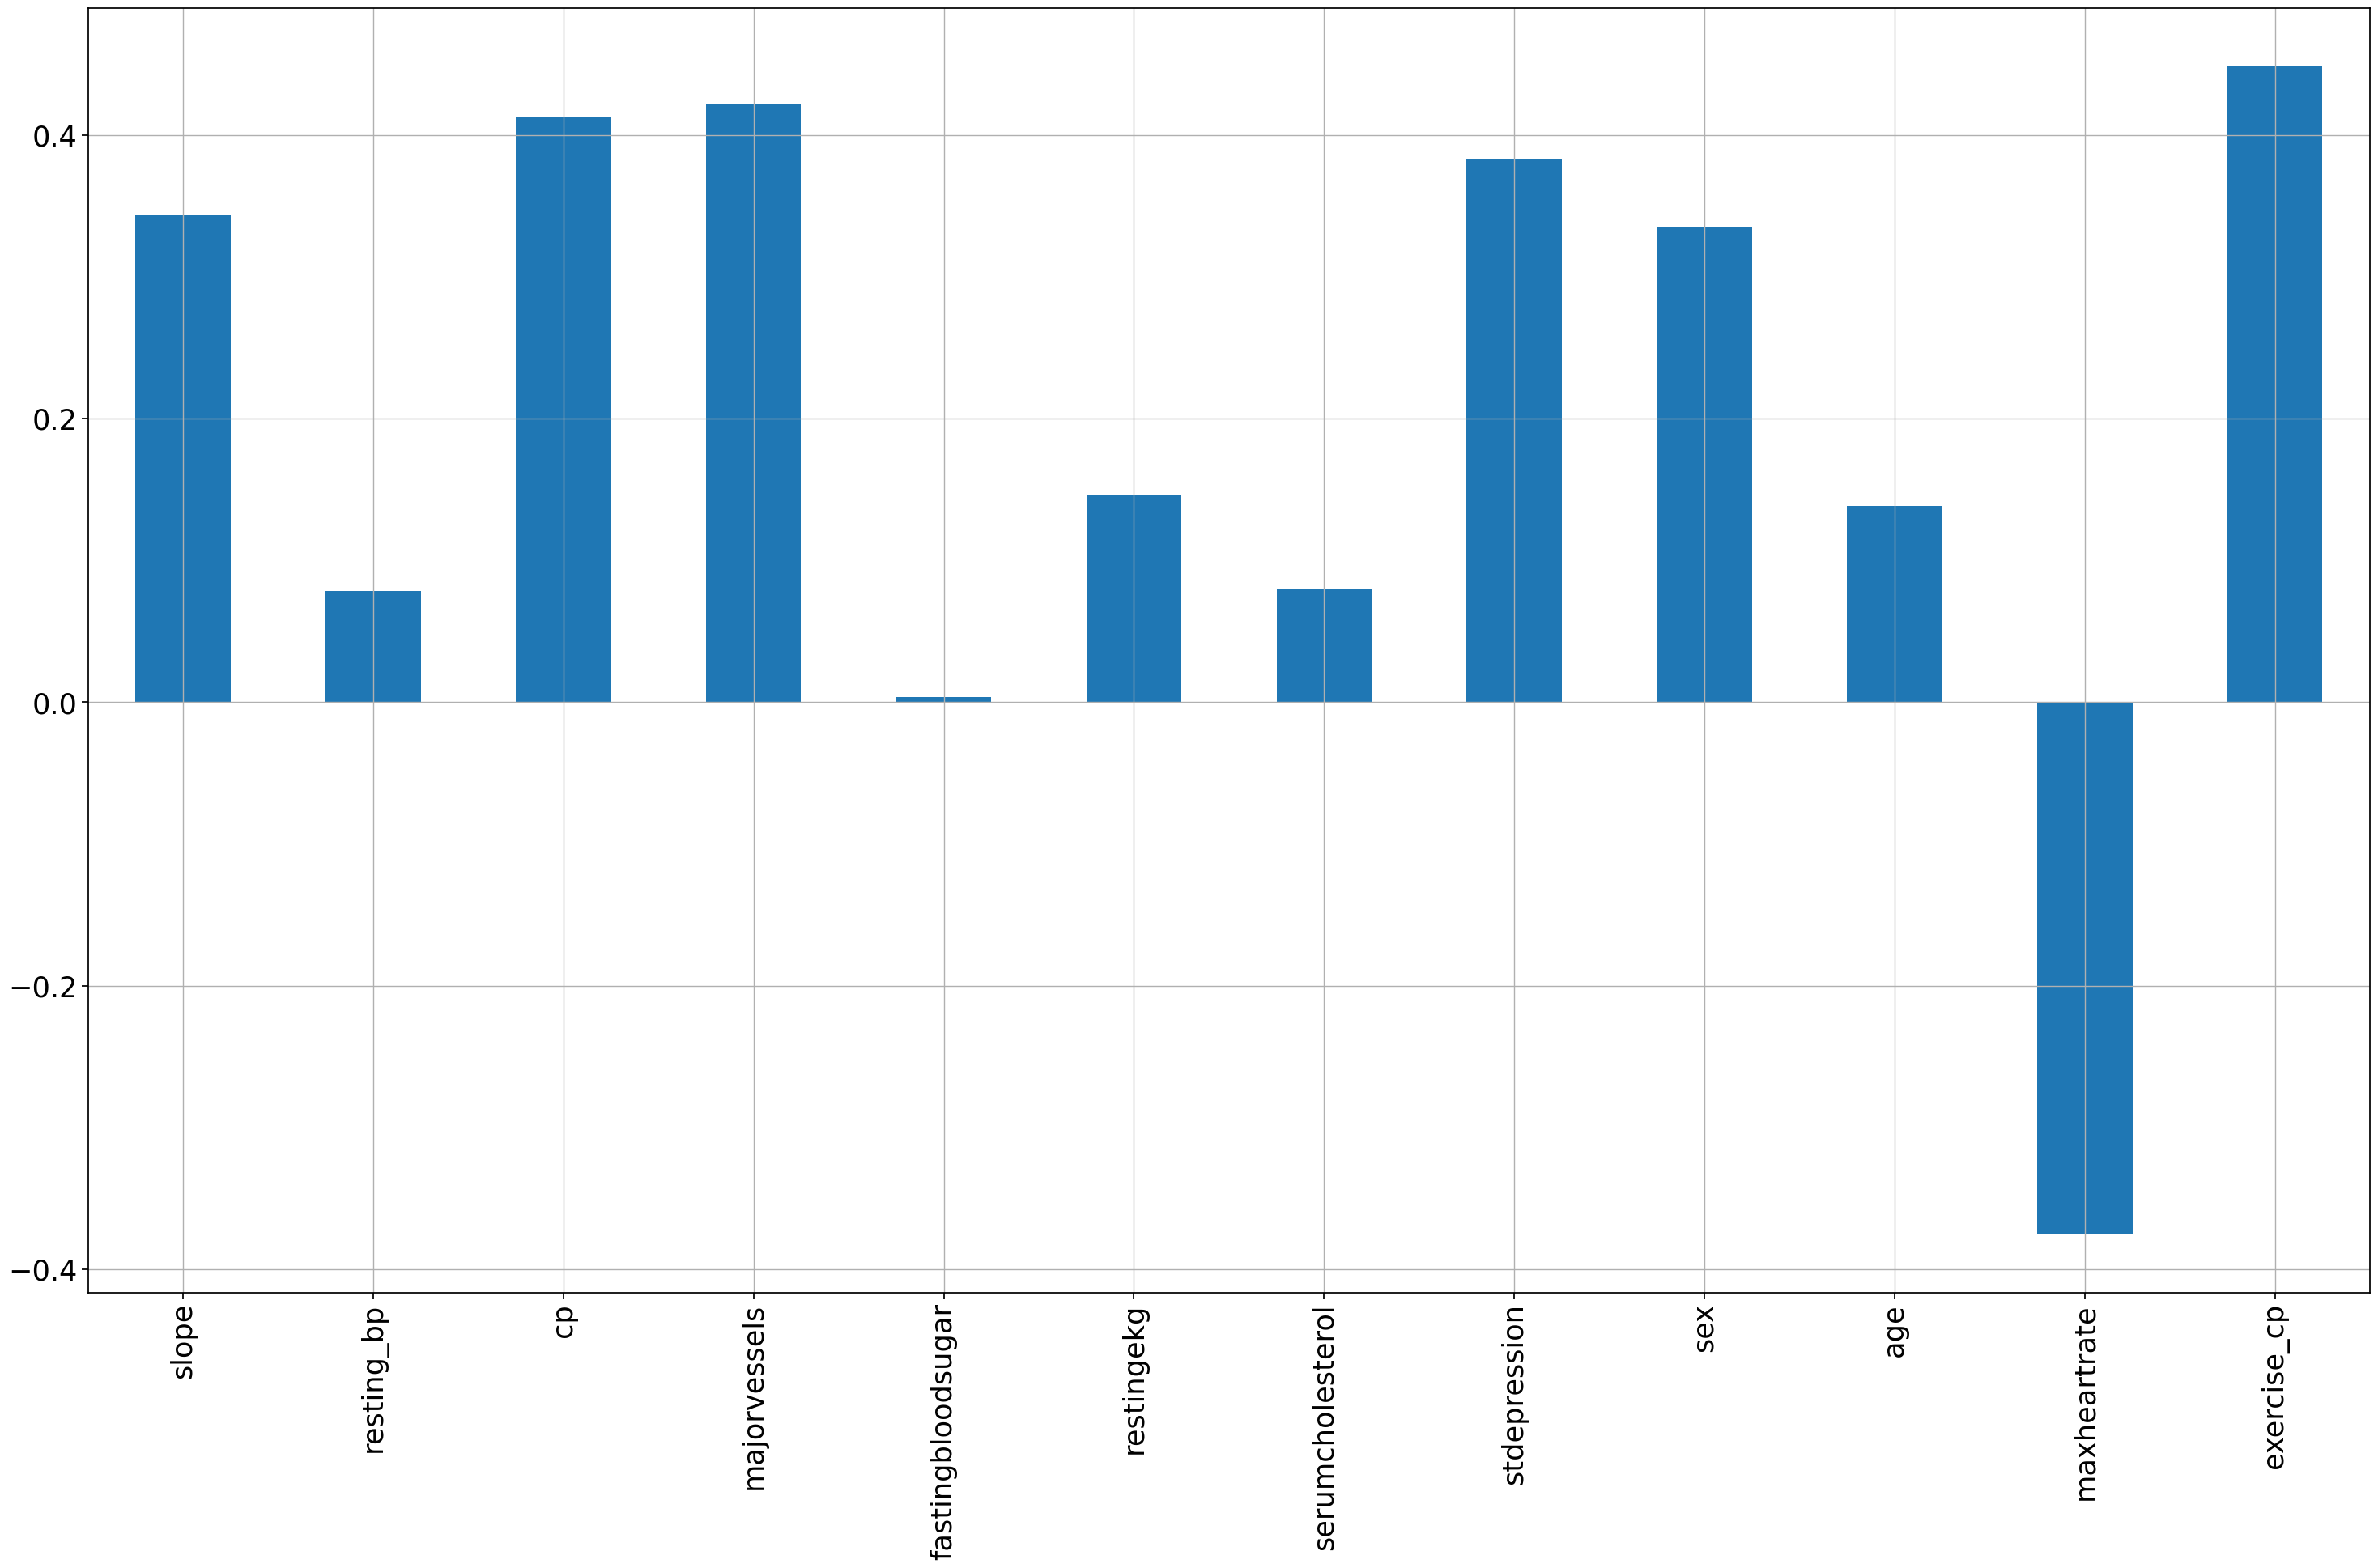

In [13]:
#Checking the correlation between the feature but it is also a good practice to check the correlation of the heart_disease_present
sns.set_context('notebook',font_scale=2.3)
df.drop('heart_disease_present',axis=1).corrwith(df.heart_disease_present).plot(kind='bar',grid=True,figsize=(30,20))
title=("Correlation with the heart_disease_present feature")
plt.tight_layout()

### INFERENCE: Insights From  The Above Graph Are:
- One feature("maxheartrate) is negatively correlated with the heart_disease_present feature.
- Other feature are positively correlated with the heart_disease_present.

##### So ,We have done enough collective analysis now let's go for the analysis of the individual feature which comprises both univarite and bivariate analysis

## Age Analysis

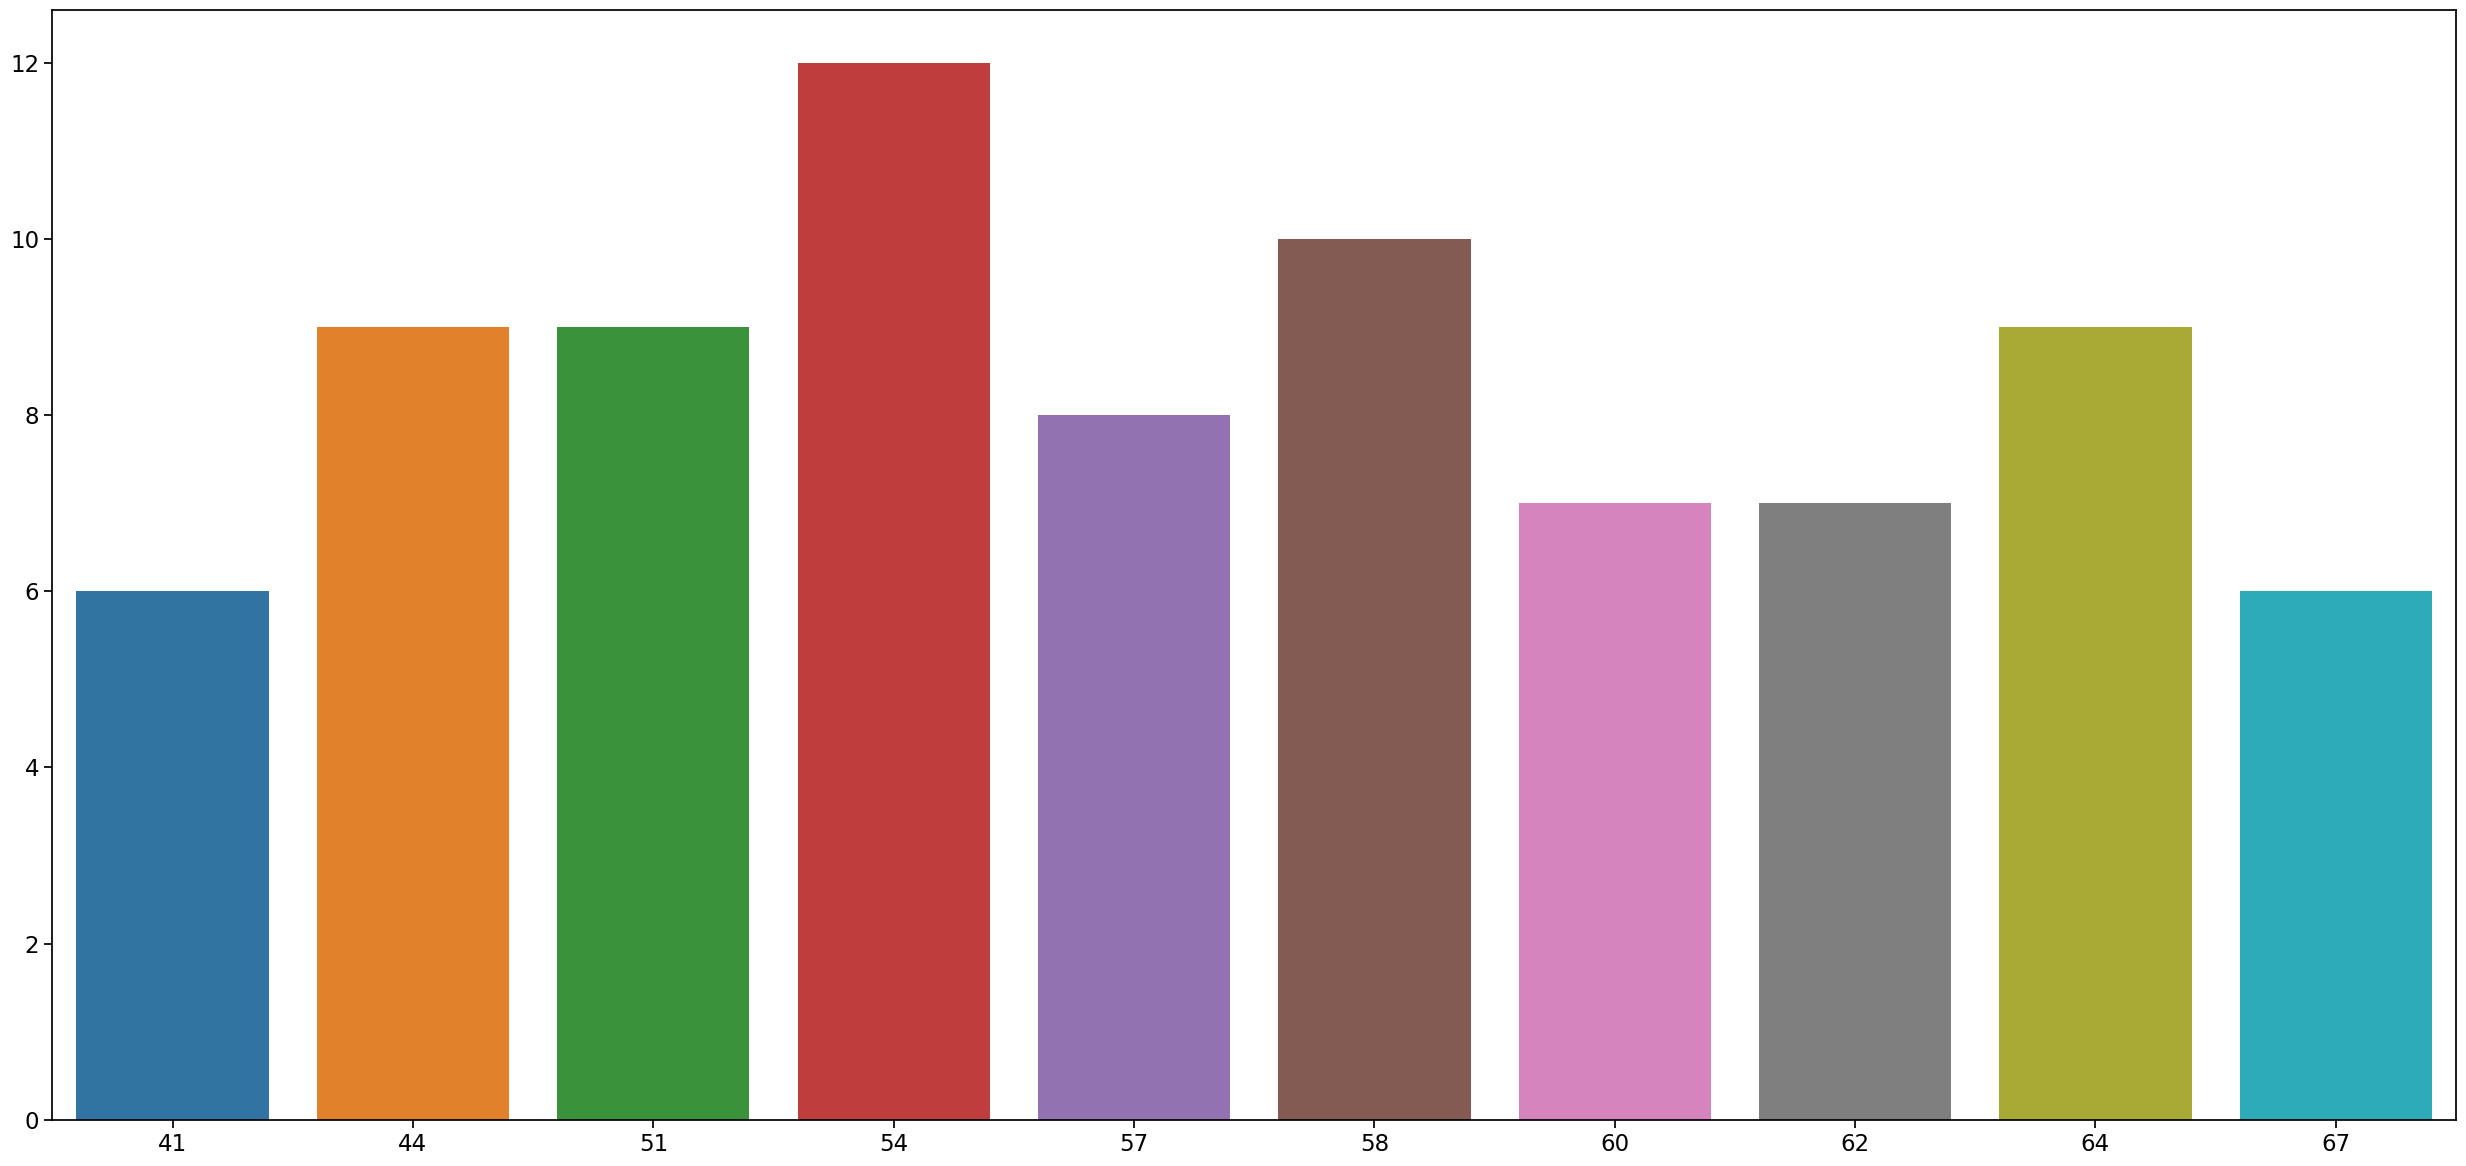

In [14]:
#checking the 10 ages and their counts.
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.tight_layout()

- Here we can see that the 54 age column has the highest frequency

In [15]:
#checking the range of age in the dataset
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.81111111111111


## Age featuring into three parts – “Young”, “Middle” and “Elder”

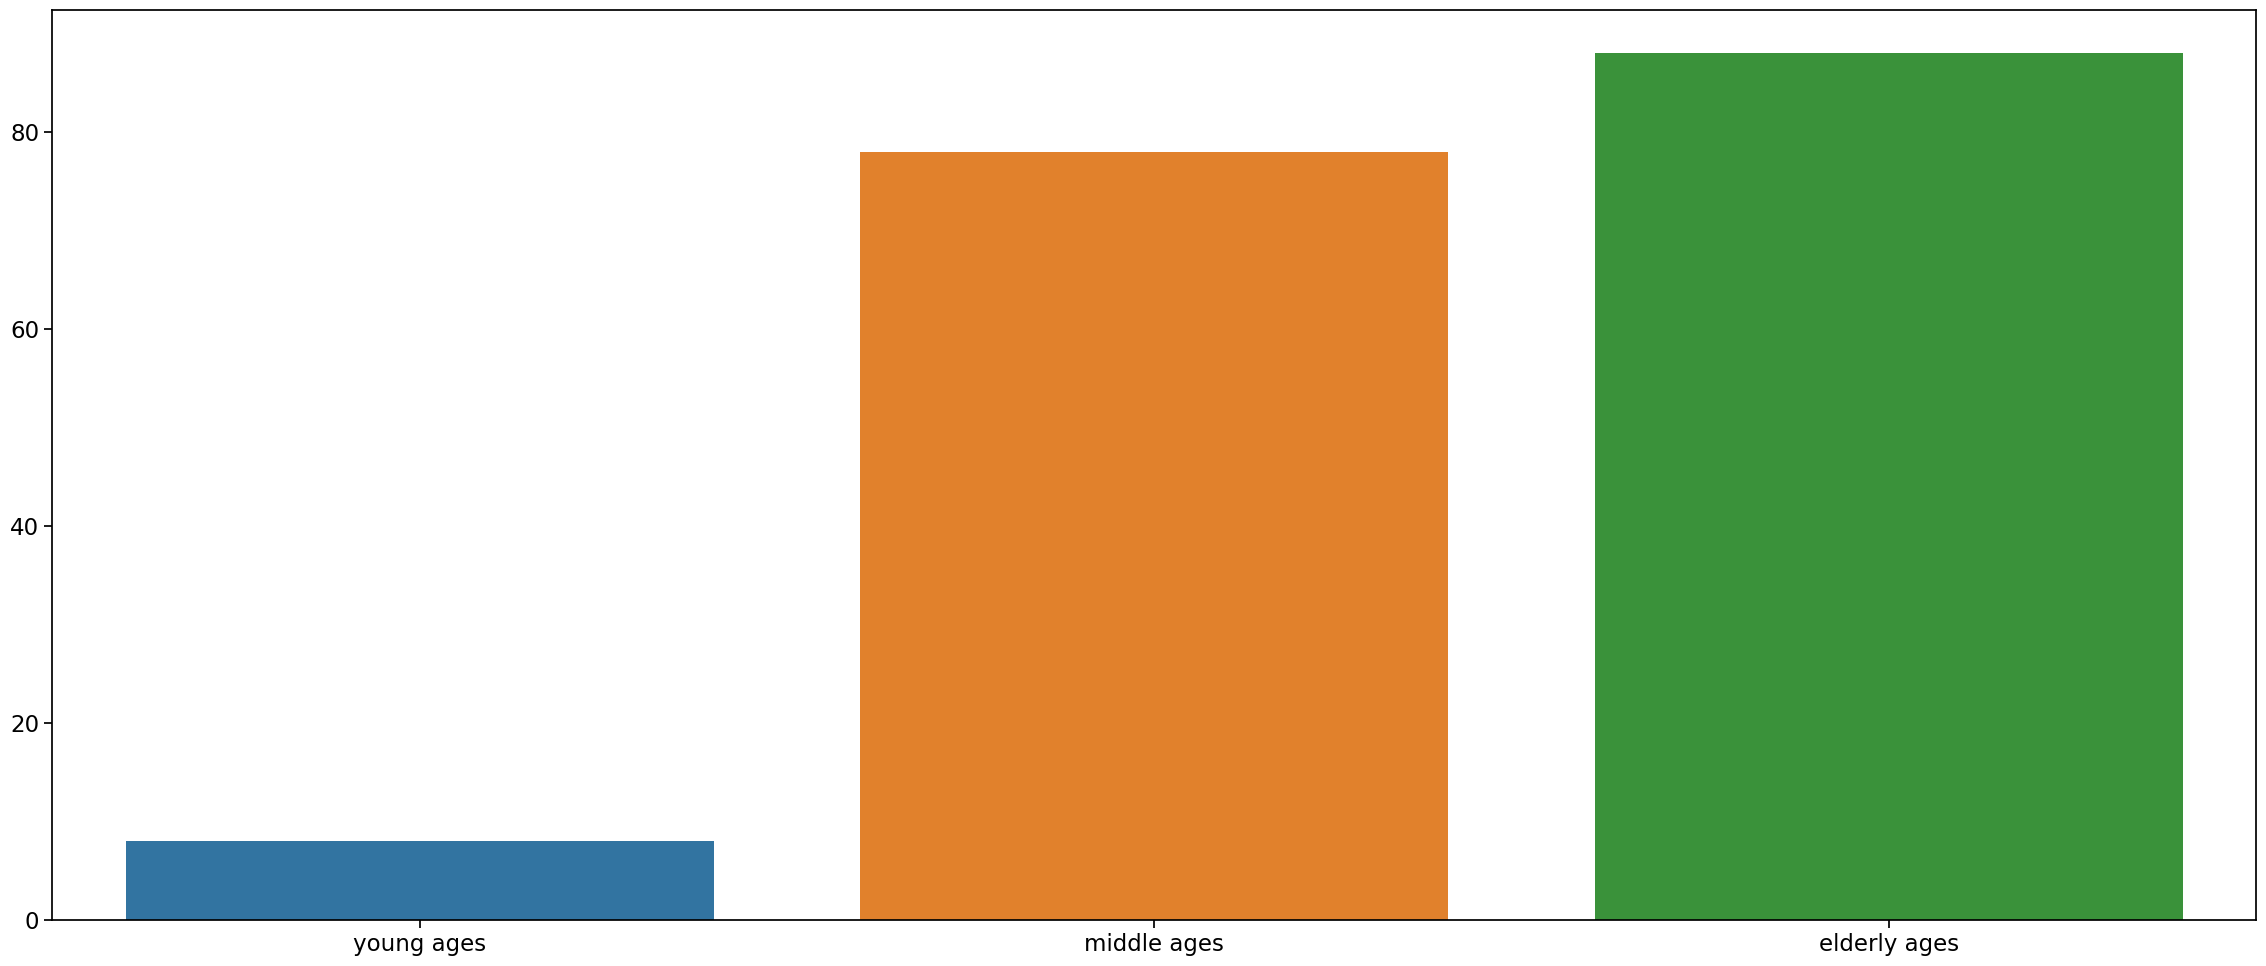

In [16]:
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

- Inference: Here we can see that elder people are the most affected by heart disease and Young people once are the least affected.

## proving the above inference by plotting the pie chart

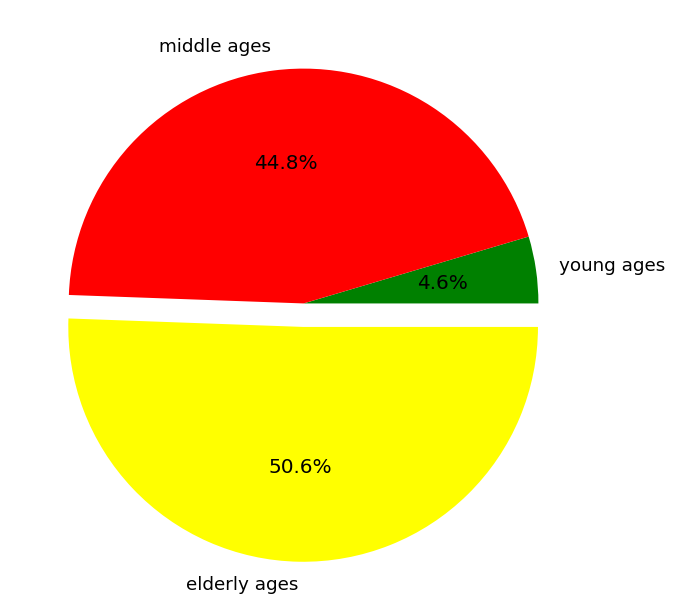

In [17]:
colors = ['green','red','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(7,7))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

## Sex Feature Analysis

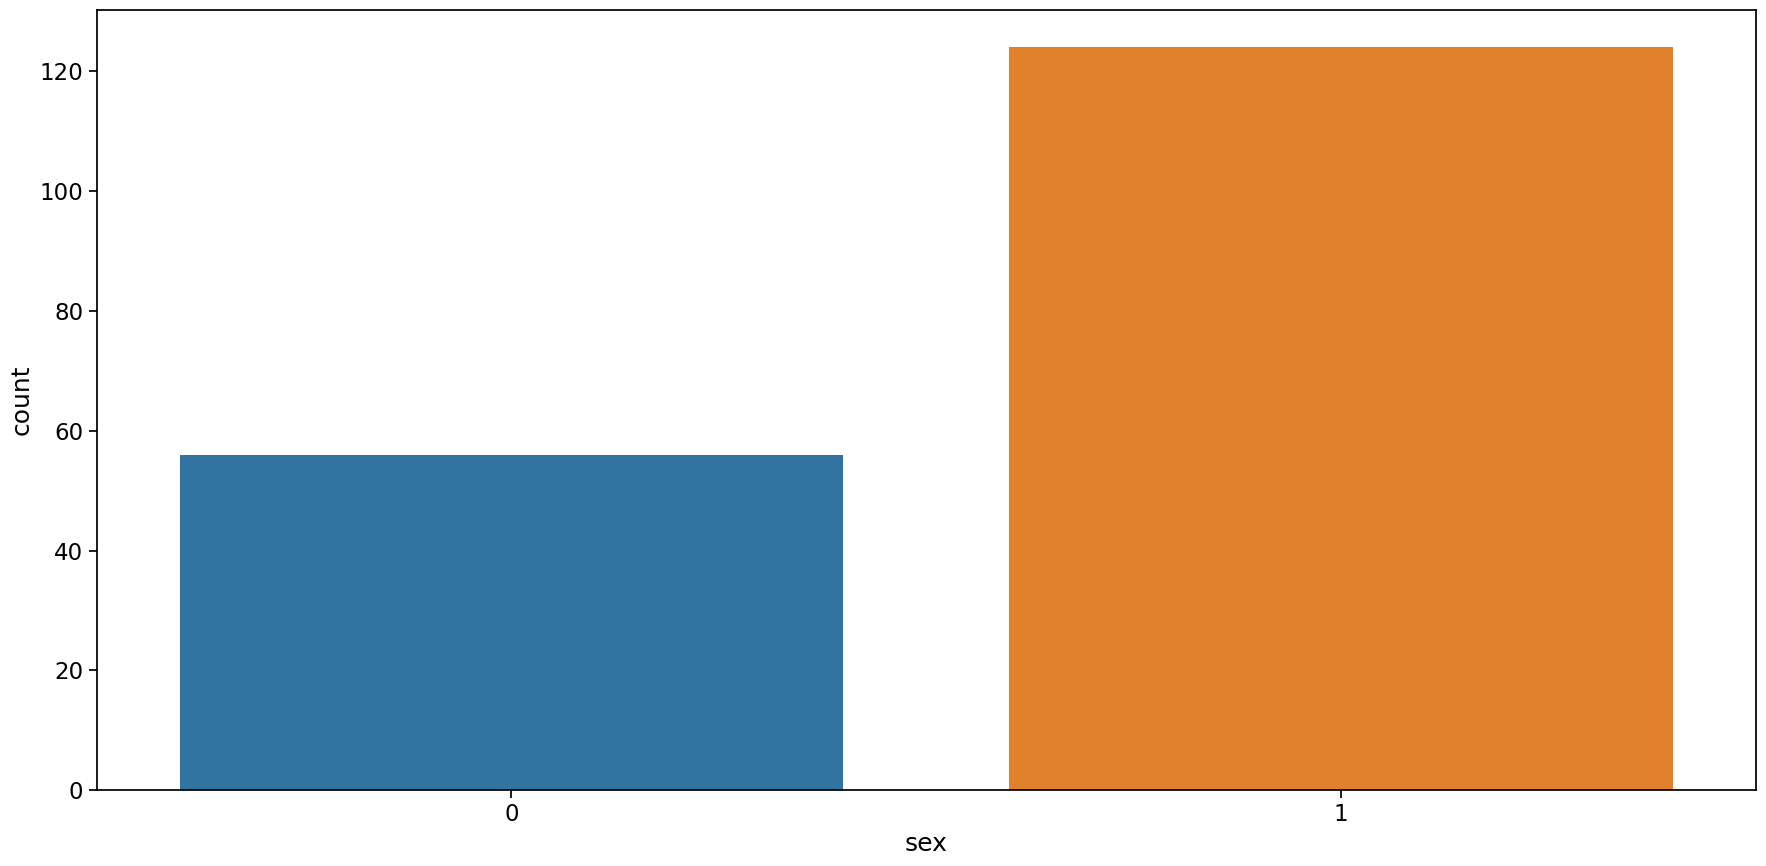

In [18]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['sex'])
plt.tight_layout()

- INFERENCE: Here it is clearly visible that Ratio of Gender is approximately 1:2

# Relation between Sex And Slop

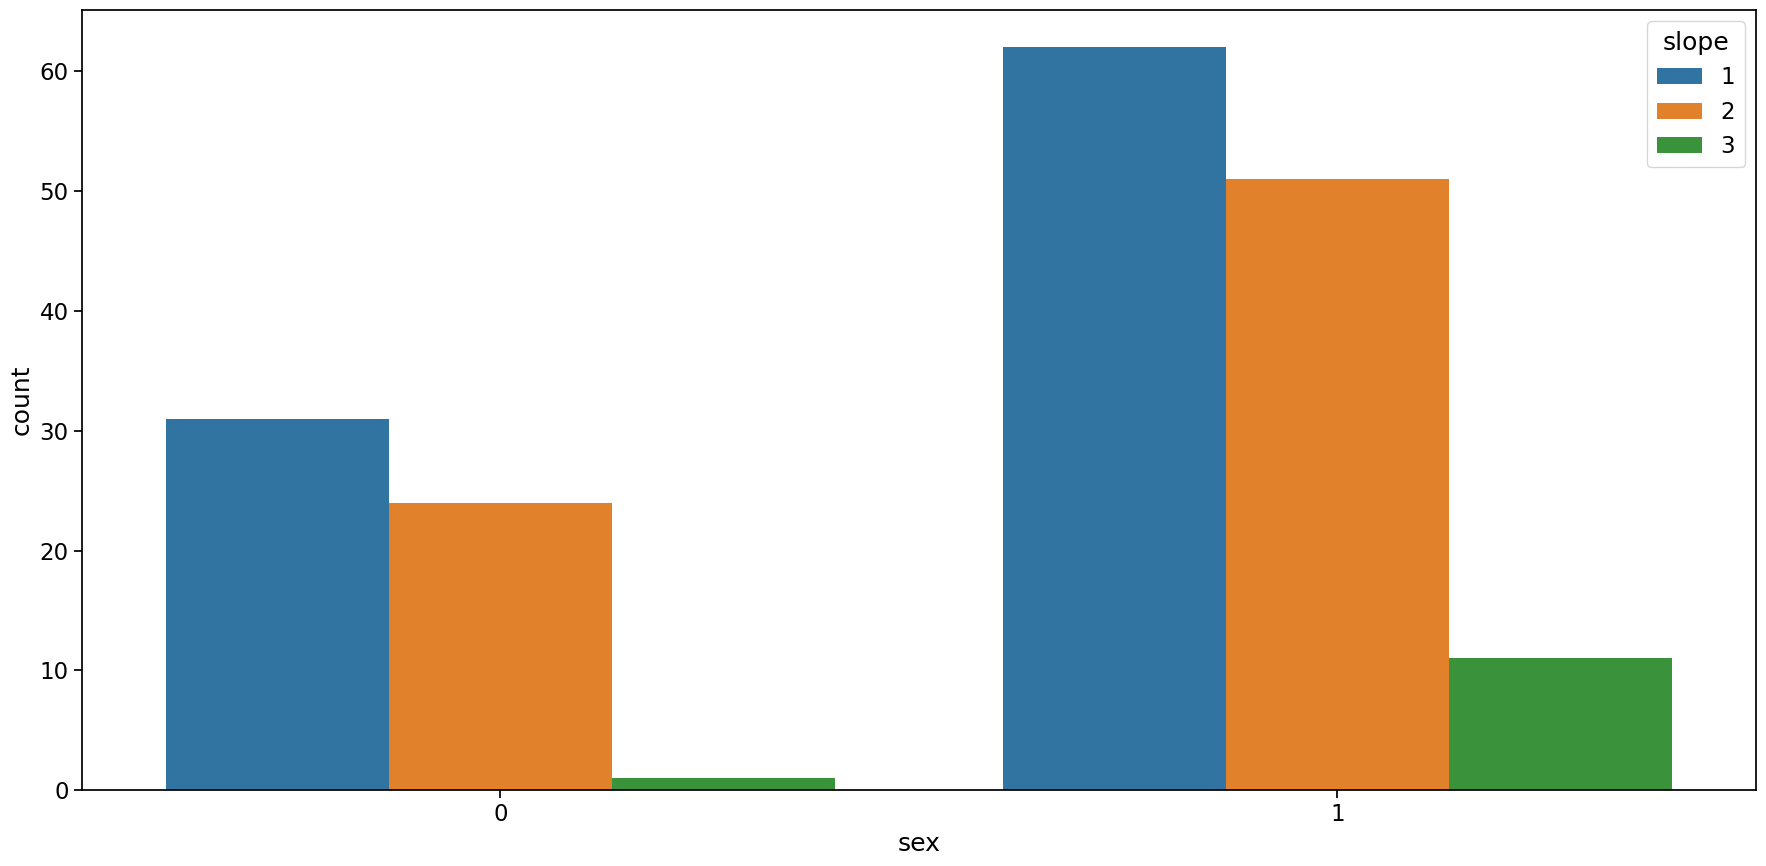

In [19]:
##  plotting the relation between sex and slope.
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['sex'],hue=df["slope"])
plt.tight_layout()

- INFERENCE: Here it is cleary visible that the slope value is higher in the case of males(1)

## Chest Pain Type(cp) Analysis

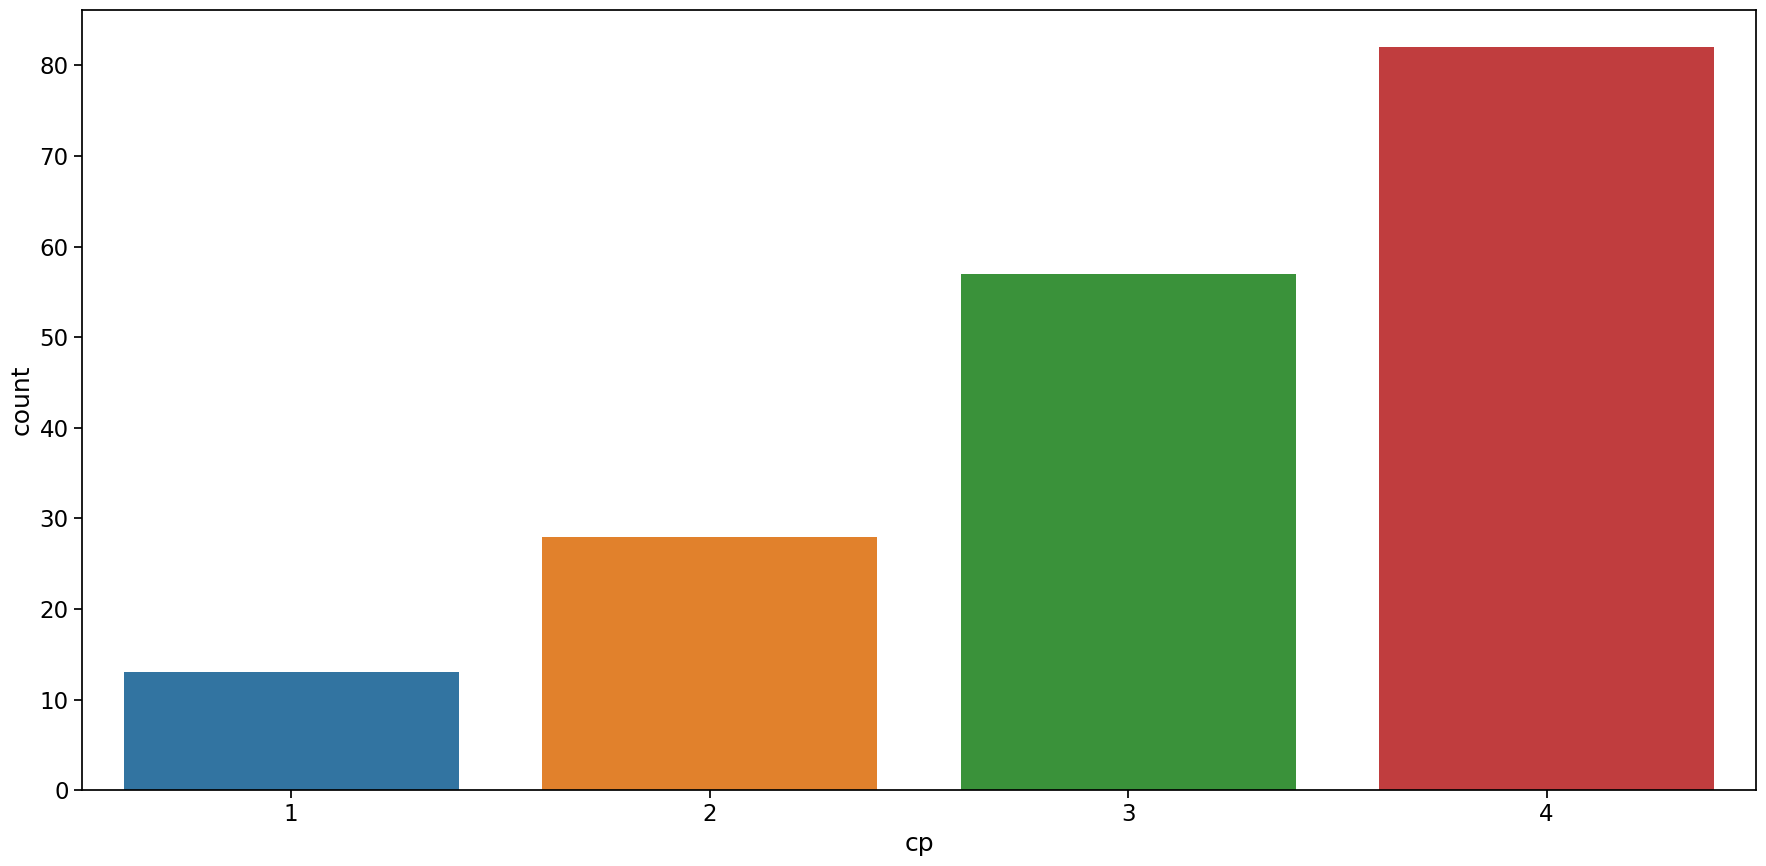

In [20]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['cp'])
plt.tight_layout()

### Inference: As seen there are 4 types of chest pain
 - 1 Stastus at least
 - 2 Condition slightly distressed
 - 3 Condition medium problem
 - 4 Condition too bad
 
> From the given graph we can see that heart condition is bad for more number of patients.

# Analysis Cp  VS  Heart disease present

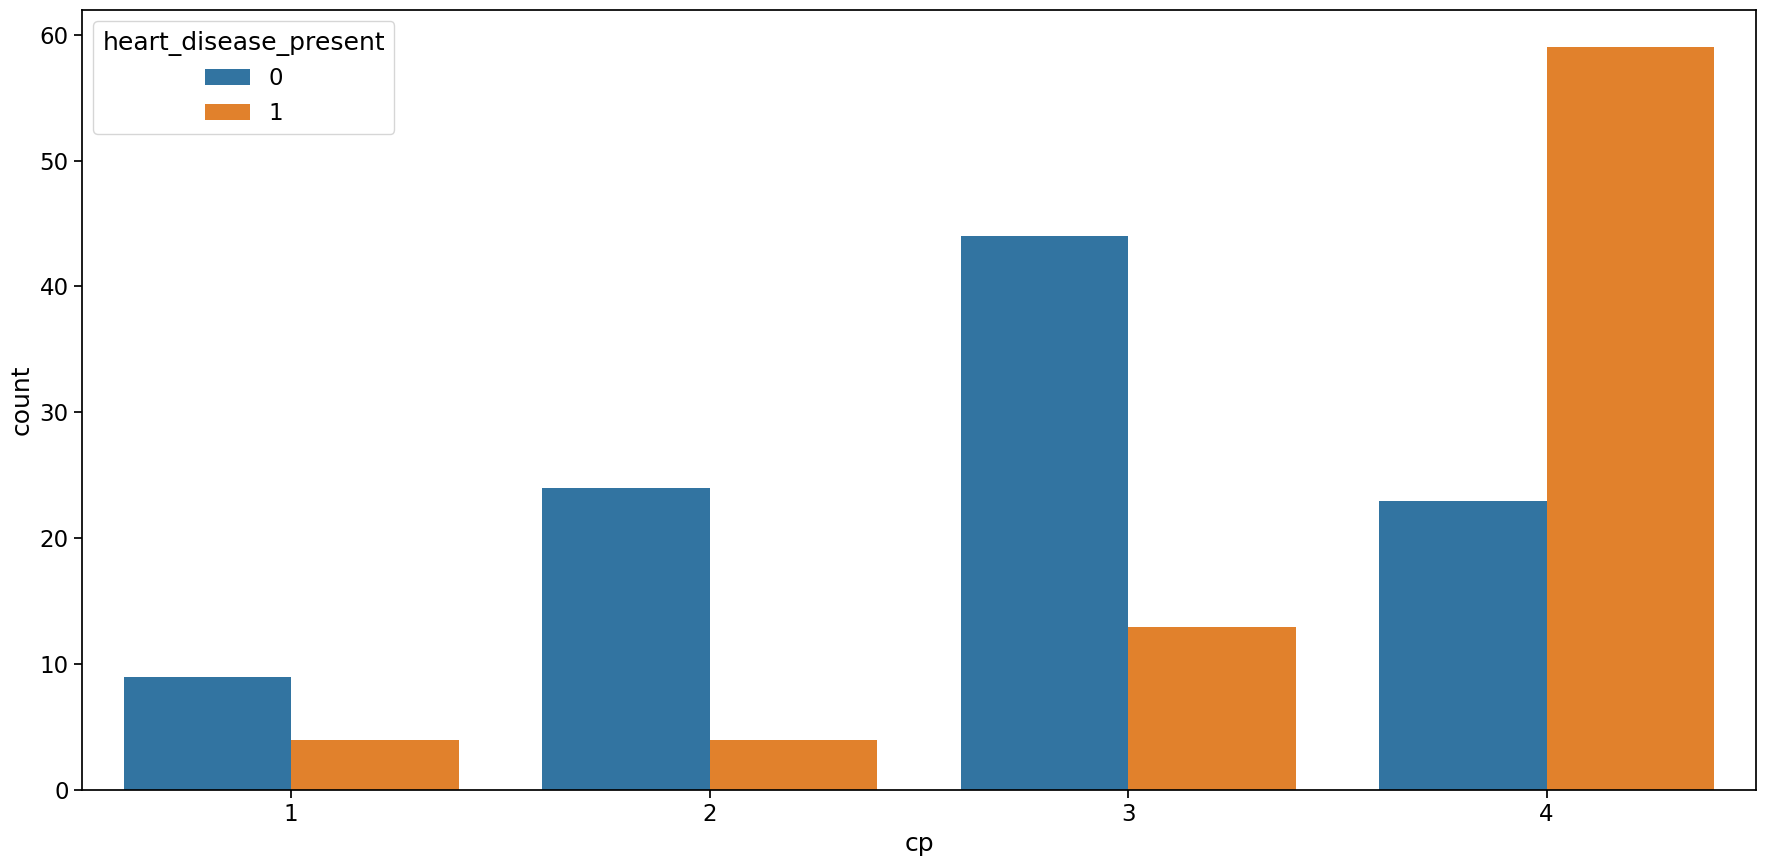

In [21]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(df['cp'],hue=df['heart_disease_present'])
plt.tight_layout()

INFERENCE: From the above graph we can make some inferences
    
- People having the least chest pain are not likely to have heart disease
- People having severe chest pain are likely to have heart disease

## Thal Analysis

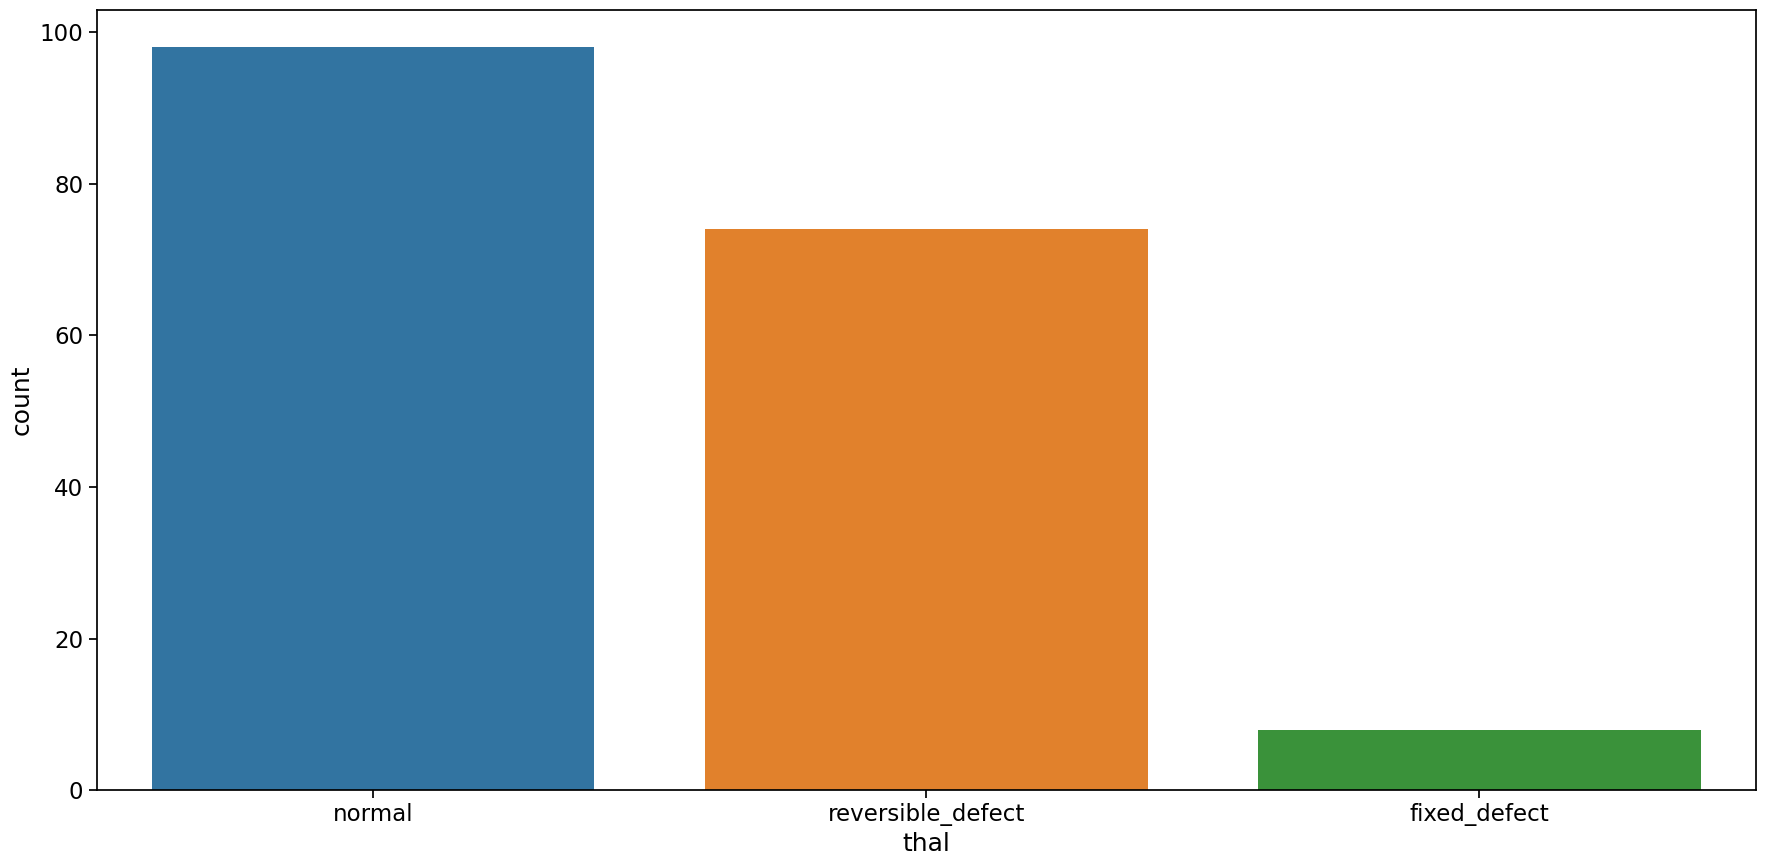

In [22]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['thal'])
plt.tight_layout()

INFERENCE: There are Three different types of Thallium
- 1 Normal
- 2 Reversible Defect Thal
- 3 Fixed Defect



> Thallium levels are normal for high number of patients

# Heart Disease Present

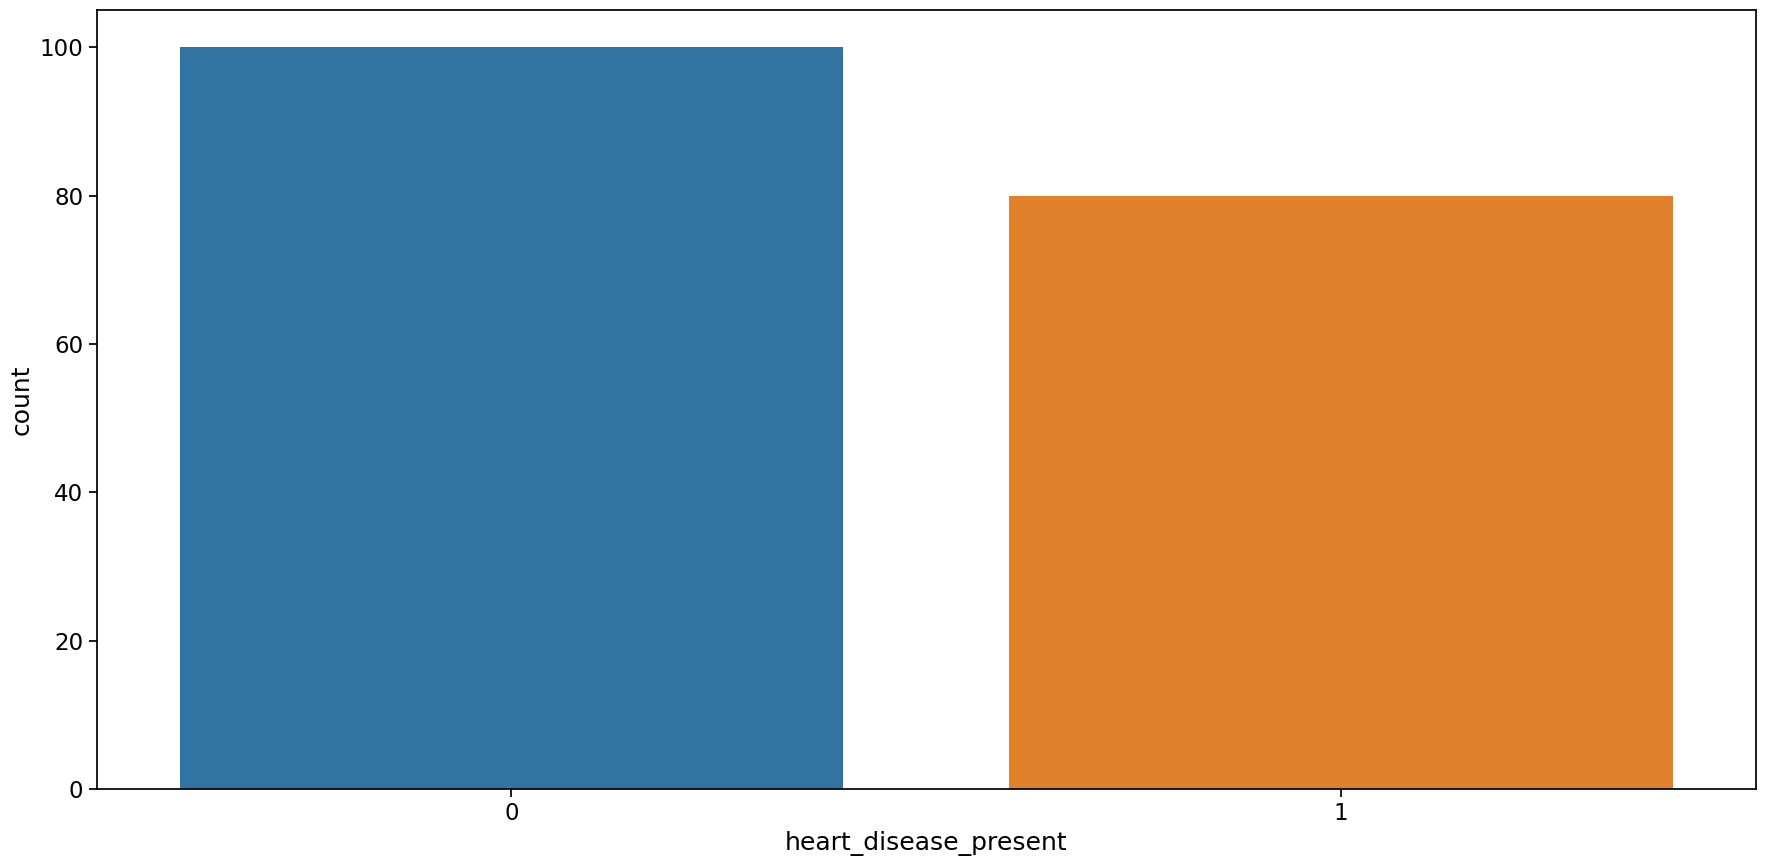

In [23]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(df['heart_disease_present'])
plt.tight_layout()

- INFERENCE:- The ratio of patients that have heart disease and that of not are 5:4

## Data Processing

### Converting String to float

In [24]:
from sklearn.preprocessing import LabelEncoder 

In [25]:
label_encoder=LabelEncoder()
df['patient_id']=label_encoder.fit_transform(df['patient_id'])
df['thal']=label_encoder.fit_transform(df['thal'])

In [26]:
print(df)

     patient_id  slope  thal  resting_bp  cp  majorvessels  fastingbloodsugar  \
0             6      1     1         128   2             0                  0   
1           147      2     1         110   3             0                  0   
2           172      1     1         125   4             3                  0   
3           112      1     2         152   4             0                  0   
4           133      3     2         178   1             0                  0   
..          ...    ...   ...         ...  ..           ...                ...   
175          40      2     2         125   4             2                  1   
176          22      2     1         180   4             0                  0   
177         131      2     2         125   3             0                  0   
178           5      1     1         124   3             2                  1   
179          21      1     1         160   3             1                  0   

     restingekg  serumchole

#### The above code converts the string values of patient_id and thal to numerical values.

## Feature Engineering

In [27]:
categorical_val = []
continous_val = []
for column in df.columns:
    print("--------------------")
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
patient_id : [  6 147 172 112 133 116  20  71  28  11 114 168 124 178  82  19 142  14
 122  23  70 110 104  38  52  90 179  84 117  51  41 175 109   3  37 135
 169 156  64  13 157  92  96 173  80  89  42 145   8 171  26  79 143 126
  17 107  24 155  63 101 146 120 136 140  35 127 121  86 108 123  27 100
 141 139  99  36  95 162  44 149  30  77  25 161  45  94  91  67  98  54
 105 177 166 164  49  74  68 174  93  65 144  59  16 115 165 134 148  48
  76  31   2  29  46 150 129 118  66  58  18  10 106  85  55  43 154  34
   4 163 153 119   7  56  12  83  75   1  88  60  78 151 130  33 160  47
  62  72 176 125  69  53 167  57 128 152  32  87   0   9 102  81  73  61
 159  97 111 113 170 137  50  15 138 158 103  39 132  40  22 131   5  21]
--------------------
slope : [1 2 3]
--------------------
thal : [1 2 0]
--------------------
resting_bp : [128 110 125 152 178 130 150 170 120 140 138 144 136 160 108 106 156 180
 112 122 124 135 105 115 126 172 145 118 134 100 155 13

## Metrics for classification Technique

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Scaler

In [29]:
from sklearn.preprocessing import StandardScaler


In [30]:
sc= StandardScaler()
col_to_scale=['age','resting_bp','serumcholesterol','stdepression','maxheartrate']
df[col_to_scale]=sc.fit_transform(df[col_to_scale])
df.head()

,patient_id,slope,thal,resting_bp,cp,majorvessels,fastingbloodsugar,restingekg,serumcholesterol,stdepression,sex,age,maxheartrate,exercise_cp,heart_disease_present
0,6,1,1,-0.195195,2,0,0,2,1.118269,-0.903207,1,-1.053964,0.932485,0,0
1,147,2,1,-1.256320,3,0,0,0,-0.669778,0.527616,0,-0.087134,0.387084,0,0
2,172,1,1,-0.372049,4,3,0,2,1.042182,-0.903207,1,2.383654,0.568884,1,1
3,112,1,2,1.219639,4,0,0,0,-0.498582,-0.903207,1,-1.591092,1.432436,0,1
4,133,3,2,2.752375,1,0,0,2,0.395442,2.852703,1,0.449994,-0.203768,0,0


## Training the Model

In [31]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#### Splitting our Dataset

In [32]:
X=df.drop('heart_disease_present',axis=1)
y=df.heart_disease_present

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
def my_confusion_matrix(y_test,y_pred,plt_title):
    cm=confusion_matrix(y_test,y_pred)
    print(classification_report(y_test,y_pred))
    sns.heatmap(cm,annot=True,fmt='g',cbr=False,cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [53]:
log=LogisticRegression()
log.fit(X_train,y_train)
log.score(X_test,y_test)


0.7407407407407407

# The KNN Machine Learning Algorithm


In [54]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
knn =KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7037037037037037

## XGBClassifier

In [57]:
!pip install xgboost

In [58]:
from xgboost import XGBClassifier

In [60]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

0.8333333333333334

## RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.8703703703703703

## SVM

In [63]:
from sklearn.svm import SVC

In [64]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.5925925925925926

## GaussianNB

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
gnb= GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.7777777777777778

## Representing the accuracy using prettytable

In [67]:
!pip install prettytable

In [68]:
from prettytable import PrettyTable

In [71]:
pt = PrettyTable()
pt.field_names=['Model','Accuracy Score']
pt.add_row(['LogisticRgression','74%'])
pt.add_row(['KNeighboursClassfier','70%'])
pt.add_row(['XGBClassifier','83%'])
pt.add_row(['RandomForestClassifier','87%'])
pt.add_row(['GaussianNB','77%'])
pt.add_row(['SVM','59%'])

print(pt)


+------------------------+----------------+
|         Model          | Accuracy Score |
+------------------------+----------------+
|   LogisticRgression    |      74%       |
|  KNeighboursClassfier  |      70%       |
|     XGBClassifier      |      83%       |
| RandomForestClassifier |      87%       |
|       GaussianNB       |      77%       |
|          SVM           |      59%       |
+------------------------+----------------+


# Conclusion
### The project involved analysis of the heart disease patient dataset with the proper dataprocessing then 6 models were trained and tested with maximum score as shown above table

## RandomForestClassfier scored the best score of 87% 

## Suggestion to the Hospital
- Elderly People Have a higher chance of having heart disease.
- Patients coming with chestpain conditions that is coming under the category of to bad have a higher probability of having
  heart disease.
- Elderly Males have a higher probability of having heart disease.